# Machine Learning and Statistics Tasks 2020

## Task 1: sqrt2

This task was accomplished by writing the sqrt2(**its, prec**) Python function, shown below.

This function uses continued fractions to calculate a rational number that is an approximate value of the square root of 2 [1](#ref1). It uses a recursive algorithm to calculate and refine the numerator *p* and denominator *q* of the approximate value step by step for a number of iterations **its** (200 in this case for a very accurate approximation). The algorithm is as follows:

p<sub>n+1</sub> = p<sub>n</sub> + 2q<sub>n</sub><br>
q<sub>n+1</sub> = p<sub>n</sub> + q<sub>n</sub>

where *p<sub>n+1</sub>* is the next step of the numerator, *p<sub>n</sub>* is the previous step of the numerator, and *q<sub>n+1</sub>* and *q<sub>n</sub>* are the next and previous steps of the numerator and denominator respectively.

The function then takes the final calculated values for *p* and *q* and uses a long division algorithm to calculate digits of the square root of 2 decimal by decimal. This algorithm is a computational implementation of pen-and-paper long division. The algorithm has 5 steps:

1. Calculate the result of division of *p* and *q*.
2. Append the result from Step 1 to the string that is to be returned by the function.
3. Calculate the remainder after division of *p* and *q*.
4. Make *p* equal the result from Step 3 multipled by 10.
5. Repeat for **prec** number of digits (100 in this case).

The algorithm is defined as follows:

In [48]:
# sqrt2 function definition, calculates the square
# root of 2 through long division and returns 
# a string with the digits of the square root of 2
# sqrt2 takes in its, which is number of iterations of
# the continued fractions recursive algorithm
# and prec which indicates to how many decimal
# places the string with the digits of the square
# root of 2 to be returned has
def sqrt2(its, prec):

    # pold is the numerator at previous step, pnew is numerator at next step
    pold = 1
    pnew = 0

    # qold is the denominator at previous step, qnew is denominator at next step
    qold = 1
    qnew = 0

    # This calculates an approximation of sqrt(2) as a rational number
    # with pnew and pold as numerators (in the next and previous step
    # respectively) and qnew and qold as denominators (in the next and 
    # previous steps respectively) for its iterations 
    for i in range(0, its):

        # This is the recursion algorithm, derived from
        # the formula for continued fractions
        pnew = pold + 2*qold
        qnew = pold + qold

        # Make the new numerator and denominator
        # equal the old numerator and denominator
        # for the next step in the loop
        pold = pnew
        qold = qnew

    # This appends the first digit of sqrt(2)
    # to output_string (the string to be
    # returned)
    output_string = str(pnew // qnew) + "."

    # This is the first step in the long division algorithm
    # pnew is set to the remainder of pnew and qnew after
    # division and multipled by ten for the first decimal
    # place
    pnew = (pnew % qnew) * 10

    # This performs the long division algorithm for each decimal place
    # (defined by prec) and appends the digits of sqrt(2) 
    # digit by digit to the output_string, which is returned 
    # at the end of the function
    for i in range(1, prec+1):
        output_string += str(pnew//qnew)
        pnew = (pnew % qnew) * 10

    # This returns the string, which has prec decimal places
    # of sqrt(2)
    return output_string

The square root of 2 to 100 decimal places is:

In [49]:
result = sqrt2(200, 100)

In [50]:
result

'1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727'

This is compared with this result taken from a square root of 2 calculator online [2](#ref2):

In [51]:
test = "1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727"

In [52]:
result == test

True

This result has been verified to be correct.

## Task 2: Chi-squared test
This task was accomplished using the dataset taken from Wikipedia article on the Chi-squared test [3](#ref3) https://en.wikipedia.org/wiki/Chi-squared_test

The task is to perform the Chi-squared test on a dataset of workers. This dataset has the number of workers in particular neighborhoods (marked A, B, C and D). The workers are delineated by what type of worker they are, i.e., whether they are white collar, blue collar or no collar workers.

The null hypothesis is that type of worker does not effect their choice of neighborhood. In other words, the number of X collar worker (where X is White, Blue or No) in a particular neighborhood is the same as the average of all the workers in that neighborhood.

First, the workers dataset is defined as a dataframe using the Pandas package:

In [2]:
# import pandas module
import pandas as pd
# define workers dataframe
workers = pd.DataFrame(
    # number of workers
    # different columns indicate different neighborhoods
    # different rows indicate different collars or types
    [
        [90,60,104,95],
        [30,50,51,20],
        [30,40, 45, 35],
    ],
    # define row labels
    index=["White collar","Blue collar", "No collar"],
    # define column labels
    columns=["A", "B", "C", "D"])
workers           

,A,B,C,D
White collar,90,60,104,95
Blue collar,30,50,51,20
No collar,30,40,45,35


The **chi2_contingency** function taken from the **scipy.stats** package is used to calculate the Chi-squared statistic, p-value, degrees of freedom and expected values using this dataframe: [4](#ref4)

In [3]:
from scipy.stats import chi2_contingency
# Chi-squared statistic
print("The chi-squared statistic is: {}".format(chi2_contingency(workers)[0]))
# p-value
print("The p-value is: {}".format(chi2_contingency(workers)[1]))
# degrees of freedom
print("The no of degrees of freedom is: {}".format(chi2_contingency(workers)[2]))
# numpy array of expected values
print("The expected values are: \n{}".format(chi2_contingency(workers)[3]))

The chi-squared statistic is: 24.5712028585826
The p-value is: 0.0004098425861096696
The no of degrees of freedom is: 6
The expected values are: 
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


24.57 (or 24.6 when rounded down) is the test statistic calculated in the Wikipedia article, so the result is verified. This value is the sum of the observed values minus the expected values, divided by the expected values.

The p-value associated with this statistic is approximately 0.00041. This means that we can safely reject the null hypothesis that the type or collar of the worker has no effect on choice of neighborhood as 0.00041 is much less than the critical value of 0.05 or 5% [5](#ref5).

The degrees of freedom in this instance is the number of rows minus 1 multiplied by the number of columns minus 1, which is the same as the number of neighborhoods -1 multipled by the number of types of workers -1. This equals 6.

The expected values are the average, mean or expected values of the number of workers calculated by multiplying the total number of workers in each neighborhood by the total number of workers by collar divided by the total number of workers (650). For instance, for the expected number of white collar workers in A:

In [81]:
(90+30+30)*((90 +60 +104+95)/650)

80.53846153846155

which is the value output by **chi2_contingency**:

In [83]:
print(chi2_contingency(workers)[3][0][0])

80.53846153846153


## Task 3: Excel functions
The two Excel functions that are being compared are STDDEV.P and STDDEV.S. Both these functions calculate the standard deviation of a given dataset. The difference is that STDDEV.P assumes that the data is a representation of the whole population [6](#ref6). STDDEV.S assumes that the data is merely a sample of the population [7](#ref7). STDDEV.P uses the standard "n" method whereas STDDEV.S uses the "n-1" method to calculate the standard deviation.

In order to test the difference between these two, the package **numpy** is used. First, a poulation **p** of 100,000 randomly generated data points is created using the normal distribution using the numpy.random.normal function so the standard deivation is known in advance (it is 1). Then the function numpy.random.choice is used to select a sample **s** of size 100 from the population. Then the equivalent of STDDEV.P and STDDEV.S in numpy using the numpy.std function [8](#ref8) is applied to the sample and compared with the actual standard deviation of the population.

Since the sample is chosen randomly, it is possible it is chosen in such a way that the standard deviations of the sample are not close to the population. To counteract this, the calculations are done 1000 times and the averages of the standard deviations over those iterations are chosen as estimates of the standard deviation.

The percentage marginal differences between the real and estimated standard deviations calculated and output to the screen:

In [10]:
import numpy as np

# mean = 0 and standard deviation = 1
mu, sigma = 0, 1 

# standard deviations set to 0 before loop runs
p_std = 0
s_std = 0

# loop to get average over 500 random samples
for i in range(0, 1000):
    # p is the population generated using np.random.normal
    p = np.random.normal(mu, sigma, 100000)
    # s is the randomly selected sample of p
    s = np.random.choice(p, 100)

    # STDDEV.P equivalent on s
    p_std += np.std(s)
    # STDDEV.S equivalent on s
    s_std += np.std(s, ddof=1)
    
# get averages over loop
p_std = p_std/1000
s_std = s_std/1000

# Percentage marginal differences. The absolute value of the difference is calculated in case the std calculated 
p_marg = 100*(abs((1-p_std)/1))
s_marg = 100*(abs((1-s_std)/1))
print("The average marginal difference between the real and calculated standard deviation for STDDEV.P is: {}%".format(round(p_marg, 3)))
print("The average marginal difference between the real and calculated standard deviation for STDDEV.S is: {}%".format(round(s_marg, 3)))

The average marginal difference between the real and calculated standard deviation for STDDEV.P is: 0.954%
The average marginal difference between the real and calculated standard deviation for STDDEV.S is: 0.455%


As can be seen from the results, the equivalent method for STDDEV.P calculates an estimate for the standard deviation that is further away from the real value (1) than the estimate calculated by the equivalent method for STDDEV.S. It has been verified that STDDEV.S estimates the standard deviation better when the dataset used is a sample of the population.

## Task 4: k-means clustering
The task was accomplished using the **sklearn** package.[1]

The task is to partition the Iris flower dataset into clusters. This is accomplished using k-means clustering. K-means clustering takes an unlabeled dataset with more than one dimension and finds a preset number of clusters which best divides the data in the dataset[2]. The k-means algorithm works by:

1. Randomly selecting k data points from the dataset (initial cluster point)
2. Take each datum in the dataset and measure the distance from each and every initial cluster point.
3. Assign each datum to the initial cluster point that is closest to the datum.
4. Calculate the arithmetic mean of each cluster (not the initial cluster point, but the entire cluster).
5. Repeat steps 1-4, but with the arithmetic mean of each cluster as the initial cluster point.

This method is applied to the Iris flower dataset. There are three types of flower: virginia, setosa and versicolour so 3 clusters will be used in the KMeans function taken from the **sklearn** package. First, the data is imported using **pandas**:

In [116]:
# k-means clustering
import sklearn
import pandas as pd
import numpy as np

# df is the main dataframe that will be used.
df = pd.read_csv("iris.csv")
df.head(75)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
70,5.9,3.2,4.8,1.8,versicolor
71,6.1,2.8,4.0,1.3,versicolor
72,6.3,2.5,4.9,1.5,versicolor
73,6.1,2.8,4.7,1.2,versicolor


The values without the headers shown previously are taken into a list of lists called **data**:

In [117]:
# Takes the values of the iris dataset without headers ro species
data = df.iloc[:, [0,1,2,3]].values
print(data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

The k-means clustering with 3 clusters is performed as follows:

In [119]:
# kmeans with 3 clusters
kmeans3 = KMeans(n_clusters=3)
# prediction of dataset
y_kmeans3 = kmeans3.fit_predict(data)
# print the predicted clusters for each datum
print(y_kmeans3)
# print the centroids for each cluster
print(kmeans3.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


A visual representation of the clusters is presented in a scatterplot as follows:

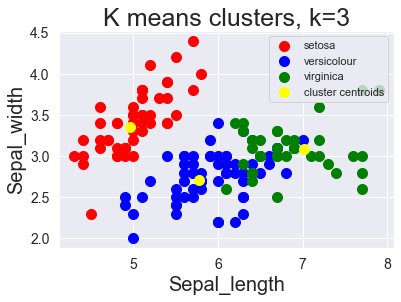

In [143]:
# to generate plots using pyplot from matplotlib
import matplotlib.pyplot as plt
# seaborn makes the plots look nicer
import seaborn as sns

# create grid for pyplots from seaborn
sns.set()


def scatter_clusters(column1, column2, xlabel, ylabel):
    #Visualising the clusters
    plt.scatter(data[y_kmeans3 == 1, column1], data[y_kmeans3 == 1, column2], s = 100, c = 'red', label = 'setosa')
    plt.scatter(data[y_kmeans3 == 0, column1], data[y_kmeans3 == 0, column2], s = 100, c = 'blue', label = 'versicolour')
    plt.scatter(data[y_kmeans3 == 2, column1], data[y_kmeans3 == 2, column2], s = 100, c = 'green', label = 'virginica')

    #Plotting the centroids of the clusters
    plt.scatter(kmeans3.cluster_centers_[:, column1], kmeans3.cluster_centers_[:,column2], s = 100, c = 'yellow', label = 'cluster centroids');

    # Title of the histogram plot
    plt.title("K means clusters, k=3", fontsize=25)
    
    # the x label of histogrm
    plt.xlabel(xlabel, fontsize=20)
    
    # the y label of histogram
    plt.ylabel(ylabel, fontsize=20)
    
    # change size of ticks of x and y axes
    ax = plt.gca()
    ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

    # plot legend
    plt.legend()
    
scatter_clusters(0, 1, "Sepal_length", "Sepal_width")

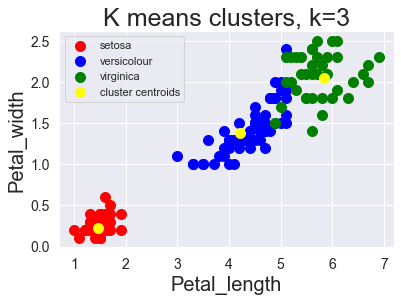

In [144]:
scatter_clusters(2, 3, "Petal_length", "Petal_width")

As can be seen from the scatter plots, the cluster centroids divide up the data very accurately.

We want to predict whether each flower is virginica, setosa or versicolor according to this clustering. To do this, we assign the value of 1 to setosa, 0 to versicolour and 2 to virginica to the predicted values (this is obtained by comparing the predicted values to the species of flower in the original dataset:

In [120]:
print(df['species'][0:10])
print(df['species'][70:74])
print(df['species'][140:150])
print(y_kmeans3)

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
5    setosa
6    setosa
7    setosa
8    setosa
9    setosa
Name: species, dtype: object
70    versicolor
71    versicolor
72    versicolor
73    versicolor
Name: species, dtype: object
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, dtype: object
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


The list of True or False values indicating whether a prediction was accurate is as follows:

In [121]:
pred_list = ["setosa" if x == 1 else 'versicolor' if x == 0 else 'virginica' for x in y_kmeans3]
original_list = df['species'].values
# return True if predicted value matches original value
# False otherwise
accurate = original_list == pred_list
print(accurate)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True False  True
  True  True  True  True  True False False  True  True  True  True False
  True False  True False  True  True False False  True  True  True  True
  True False  True  True  True  True False  True  True  True False  True
  True  True False  True  True False]


To get the accuracy percentage of the predicted values, this list is summed, divided by the total number of entries and multiplied by 100:

In [122]:
perc = 100*np.sum(np.array(accurate))/len(accurate)
print("The accuracy percentage is: {:.2f}".format(perc))

The accuracy percentage is: 89.33


This is very accurate, as expected since the data was already divided into 3 clusters (the species of flower).

It is known in advance that 3 clusters is the optimal way to divide and categorise the data. But we can confirm this using the Elbow method. The Elbow method works by trying different number of clusters k and comparing the total variation within the clusters. This total variation decreases with each successive increase in k. However, there will be one value of k for which the total variation decreases substantially from the previous value k-1 but the total variation decrease from k to k+1 will not be nearly as substantial. This value is called the "elbow" because when the variation (or the "within cluster sum of squares") is plotted against k the graph resembles an elbow at this point.

The elbow method applied to the Iris dataset is as follows:

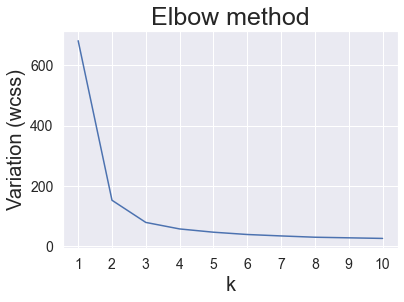

In [152]:
variation = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    variation.append(kmeans.inertia_)

# Plot to observe the elbow
plt.plot(range(1, 11), wcss)

# Title of the histogram plot
plt.title("Elbow method", fontsize=25)
    
# x label of elbow plot
plt.xlabel("k", fontsize=20)
    
# y label of elbow plot
plt.ylabel("Variation (wcss)", fontsize=20)

# change size of ticks of x and y axes
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)

# show all x ticks to emphasise elbow
plt.xticks(range(1, 11))

# show plot
plt.show()

As can be seem from the graph, the "elbow" is clearly locatged at k=3. This confirms that the optimal number of clusters for the Iris flower dataset is 3, which is the number of species of flower.

## References ##

[1] Numbers, constants and computation, Xavier Gourdon and Pascal Sebah, accessed 6 October 2020, <http://numbers.computation.free.fr/Constants/Sqrt2/sqrt2.html> <a name="ref1"></a><br>
[2] CATONMAT, Peteris Krumins, accessed 6 October 2020, <https://catonmat.net/tools/generate-sqrt2-digits> <a name="ref2"></a> <br>
[3] En.wikipedia.org. 2020. Chi-Squared Test. [online] Available at: <https://en.wikipedia.org/wiki/Chi-squared_test> [Accessed 7 November 2020]. <a name="ref3"></a><br> 
[4] Medium. 2020. Gentle Introduction To Chi-Square Test For Independence. [online] Available at: <https://towardsdatascience.com/gentle-introduction-to-chi-square-test-for-independence-7182a7414a95> [Accessed 7 November 2020]. <a name="ref4"></a><br> 
[5] Statistics How To. 2020. Chi-Square Statistic: How To Calculate It / Distribution - Statistics How To. [online] Available at: <https://www.statisticshowto.com/probability-and-statistics/chi-square/> [Accessed 7 November 2020]. <a name="ref5"></a><br>
[6] Support.microsoft.com. 2020. STDEV.S Function. [online] Available at: <https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23> [Accessed 16 November 2020]. <a name="ref6"></a><br>
[7] Support.microsoft.com. 2020. STDEV.P Function. [online] Available at: <https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285> [Accessed 16 November 2020]. <a name="ref7"></a><br>
[8] Numpy.org. 2020. Numpy.Std — Numpy V1.19 Manual. [online] Available at: <https://numpy.org/doc/stable/reference/generated/numpy.std.html> [Accessed 16 November 2020]. <a name="ref8"></a><br>